TODO:
The CAPM, beta, and capital structure:
**Select about 15 publicly listed companies** in Norway or elsewhere. Collect data on **beta** (should be obtainable from DN), **leverage** (company
annual report, or possibly Morningstar), and other company characteristics such as industry, market
capitalization etc.

In [143]:
!pip install yfinance

In [0]:
import yfinance as yf #Worked as of 12/02/20
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

#for å regne ut beta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy import stats
import seaborn as sns
import random


In [145]:
#Scrap data / akkumulere all finansiell data
s_og_p500 = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies').text
soup = bs(s_og_p500,'lxml')
stock_ticker = []
company = []
industry = []

for items in soup.find('table', class_='wikitable').find_all('tr')[1::1]:
  table_data = items.find_all(['th','td'])
  try:
    stock_ticker.append(table_data[0].a.text)
    company.append(table_data[1].a.text)
    industry.append(table_data[4].text)
  except:
    pass


data_to_df = {'Ticker': stock_ticker, 'Company Name': company, 'Industry' : industry}
df = pd.DataFrame(data_to_df)
#pd.set_option('display.max_rows', None)

sorted_df = df.sort_values(by='Industry', ascending=True)
sorted_df


,Ticker,Company Name,Industry
255,IPG,Interpublic Group,Advertising
359,OMC,Omnicom Group,Advertising
296,LMT,Lockheed Martin Corp.,Aerospace & Defense
442,TXT,Textron Inc.,Aerospace & Defense
243,HII,Huntington Ingalls Industries,Aerospace & Defense
210,GD,General Dynamics,Aerospace & Defense
73,BA,Boeing Company,Aerospace & Defense
463,UTX,United Technologies,Aerospace & Defense
53,ARNC,Arconic Inc.,Aerospace & Defense
396,RTN,Raytheon Co.,Aerospace & Defense


**i.Discuss what beta represents and explain briefly how you would estimate it for each company
(you do not need to estimate beta).**

Svar:
Beta($\beta$) måler volatilitetenntil enkelt aktiva sammenlignet med den usystematiske risikoen til hele markedet.

$$\beta = \frac{Cov(r_{a}, r_{b})}{Var(r_b)}$$ 

$r_{a} \rightarrow \text{avkastningen til en individuell aksje}$

$r_{b} \rightarrow \text{avkastningen i det totale markedet}$


In [0]:
googl = yf.Ticker('GOOGL')
visa = yf.Ticker('V')

In [0]:
#print("Google beta: ", googl.info['beta'])
#print("Visa beta: ", visa.info['beta'])
#visa.info

In [148]:
my_portfolio = []

sorted_df.sample(n=15)



,Ticker,Company Name,Industry
255,IPG,Interpublic Group,Advertising
241,HUM,Humana Inc.,Managed Health Care
149,DISCK,Discovery Inc. Class C,Broadcasting
106,CHD,Church & Dwight,Household Products
352,NRG,NRG Energy,Independent Power Producers & Energy Traders
488,WDC,Western Digital,"Technology Hardware, Storage & Peripherals"
127,COO,The Cooper Companies,Health Care Supplies
218,GS,Goldman Sachs Group,Investment Banking & Brokerage
94,CDW,CDW,Technology Distributors
345,NBL,Noble Energy Inc,Oil & Gas Exploration & Production


In [149]:
#Regner ut beta for google
price_data = yf.download('GOOGL',start = '2017-03-01', end = '2020-03-01', interval='1mo')
price_data = price_data['Adj Close']
#Daily returns
ret_data = price_data.pct_change()[1:]

#Clean for duplicates
ret_data = ret_data[ret_data != 0.0]


print(ret_data)

[*********************100%***********************]  1 of 1 completed
Date
2017-04-01    0.090493
2017-05-01    0.067678
2017-06-01   -0.058161
2017-07-01    0.017017
2017-08-01    0.010301
2017-09-01    0.019346
2017-10-01    0.060921
2017-11-01    0.003030
2017-12-01    0.016629
2018-01-01    0.122290
2018-02-01   -0.066231
2018-03-01   -0.060494
2018-04-01   -0.017895
2018-05-01    0.079935
2018-06-01    0.026536
2018-07-01    0.086814
2018-08-01    0.003732
2018-09-01   -0.020068
2018-10-01   -0.096514
2018-11-01    0.017486
2018-12-01   -0.058298
2019-01-01    0.077448
2019-02-01    0.000586
2019-03-01    0.044685
2019-04-01    0.018753
2019-05-01   -0.077117
2019-06-01   -0.021419
2019-07-01    0.125046
2019-08-01   -0.022714
2019-09-01    0.025711
2019-10-01    0.030840
2019-11-01    0.035979
2019-12-01    0.027069
2020-01-01    0.069726
2020-02-01   -0.065279
Name: Adj Close, dtype: float64


In [150]:
#S&P 500 benchmark
benchmark_price = yf.download('SPY',start = '2017-03-01', end = '2020-03-01', interval='1mo')
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

#Cleaning for duplicates
benchmark_ret = benchmark_ret[benchmark_ret != 0.0]
print(benchmark_ret)



[*********************100%***********************]  1 of 1 completed
Date
2017-04-01    0.014320
2017-05-01    0.014113
2017-06-01    0.001491
2017-07-01    0.025531
2017-08-01    0.002918
2017-09-01    0.015112
2017-10-01    0.028644
2017-11-01    0.030566
2017-12-01    0.006981
2018-01-01    0.061759
2018-02-01   -0.036360
2018-03-01   -0.031290
2018-04-01    0.009194
2018-05-01    0.024309
2018-06-01    0.001255
2018-07-01    0.041703
2018-08-01    0.031920
2018-09-01    0.001412
2018-10-01   -0.064890
2018-11-01    0.018549
2018-12-01   -0.093343
2019-01-01    0.086373
2019-02-01    0.032416
2019-03-01    0.013636
2019-04-01    0.045437
2019-05-01   -0.063771
2019-06-01    0.064410
2019-07-01    0.020057
2019-08-01   -0.016743
2019-09-01    0.014772
2019-10-01    0.026825
2019-11-01    0.036198
2019-12-01    0.024021
2020-01-01    0.004511
2020-02-01   -0.079166
Name: Adj Close, dtype: float64


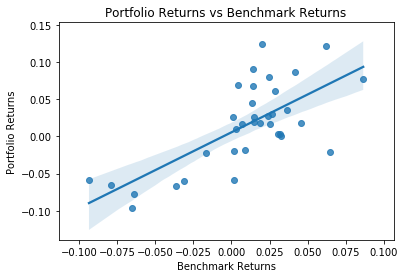

In [151]:

sns.regplot(benchmark_ret.values, ret_data.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [154]:
(beta, alpha) = stats.linregress(benchmark_ret.values, ret_data.values)[0:2]
print("Beta is", round(beta, 6))

Beta is 1.019869


In [153]:
googl.info['beta']

1.025336